# 5.2-小数据集训练CNN-对照组1
## 基准组实验条件
### 数据集：小数据集
### 训练集：1,000/类别
### 验证集：500/类别
### 测试集：500/类别
### 是否使用数据增强：是
### 训练轮数：30
### 可参考教材pp111-115

##  1 分集，创建小样本数据集的训练域/验证域/测试域（与基准组共用同一数据集，故跳过）

In [1]:
# #os.listdir(dir)，以列表形式返回目录下文件名
# print('total training small dataset cat images: ',len(os.listdir(train_cat_small_dataset_dir)))
# print('total training small dataset dog images: ',len(os.listdir(train_dog_small_dataset_dir)))
# print('total validation small dataset cat images: ',len(os.listdir(validation_cat_small_dataset_dir)))
# print('total validation small dataset dog images: ',len(os.listdir(validation_dog_small_dataset_dir)))
# print('total test small dataset cat images: ',len(os.listdir(test_cat_small_dataset_dir)))
# print('total test small dataset dog images: ',len(os.listdir(test_dog_small_dataset_dir)))

### 到目前为止，我们的数据集有2000个训练样本（猫、狗各5000个）；
### 验证集有1000个样本（猫狗各500个）；
### 测试集有1000个样本（猫狗各500个）

## 2 建模，构建卷积神经网络
### 与基准组完全一致

#### 按需添加各层

In [ ]:
from keras import models
from keras import layers

#conv2D的filters从32增加到128
my_network = models.Sequential()
#32个filter
my_network.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
my_network.add(layers.MaxPooling2D((2,2)))
#64个filter
my_network.add(layers.Conv2D(64,(3,3),activation = 'relu'))
my_network.add(layers.MaxPooling2D((2,2)))
#128个filter
my_network.add(layers.Conv2D(128,(3,3),activation = 'relu'))
my_network.add(layers.MaxPooling2D((2,2)))
#128个filter
my_network.add(layers.Conv2D(128,(3,3),activation = 'relu'))
my_network.add(layers.MaxPooling2D((2,2)))

my_network.add(layers.Flatten()) #将3D展平为1D
#为防止过拟合，使用dropout
#my_network.add(layers.Dropout(0.5))
my_network.add(layers.Dense(512, activation = 'relu'))
my_network.add(layers.Dense(1,activation='sigmoid'))#最后输出二元分类概率

#### 编译模型

In [ ]:
from keras import optimizers
my_network.compile(optimizer = optimizers.RMSprop(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['acc'])

## 3 加数，加载数据并对图像预处理
### 在基准组操作步骤的基础上增加数据增强操作

### 利用IamgeDataGenerator类来设置数据增强
#### rotation_range：图像随机旋转角度
#### width_shift/height_shift：是图像在水平和垂直方向上的平移范围
#### shear_range：是随机错切变换角度
#### zoom_range：是图像随机缩放范围
#### horizontal_flip：水平翻转
#### fill_mode：填充新创建的像素

In [5]:
from keras.preprocessing.image import ImageDataGenerator

### 3.1 创建图片变换生成器实例，并定义图片变换规则

In [ ]:
#为训练集指定图片变换规则
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

#为验证集/测试集指定图片变换规则，特别注意：不采用任何数据增强方法，仅做数据归一化操作
test_datagen = ImageDataGenerator(rescale = 1./255)



### 3.2 对指定目录下的图片集应用图片变换生成器

In [ ]:
#对指定目录下的训练集图片数据执行相应变换
train_dir = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/train'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

#对指定目录下的验证集图片数据执行相应变换
validation_dir = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/validation'

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

### 【补充】查看“数据增强”变换后的图片——对单个图片进行数据增强技术处理

#### 从训练集读取一张原始图片

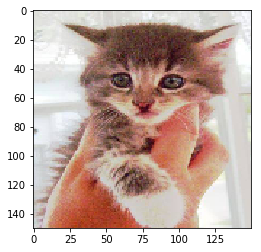

In [3]:
from keras.preprocessing import image
import os

train_cats_dir = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/train/cats'

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

#随机选择一张图片
img_path = fnames[3]
#加载图像病调整大小
img = image.load_img(img_path,target_size=(150,150))

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

#### 为该图片创建一个图片变换生成器实例，可自由选择变换条件

In [6]:
datagen = ImageDataGenerator(
    width_shift_range = 0.2
    )

#备选变换规则：
#     rotation_range = 40,
#     width_shift_range = 0.2,
#     height_shift_range = 0.2,
#     shear_range = 0.2,
#     zoom_range = 0.2,
#     horizontal_flip = True,
#     fill_mode = 'nearest'

#### 对原始图片应用图片变换生成器，并查看变换后的效果

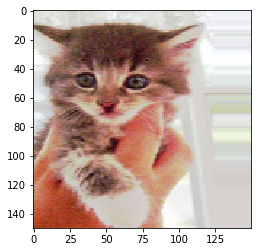

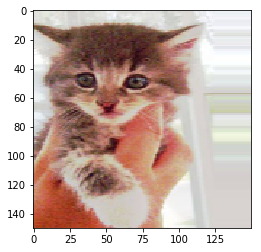

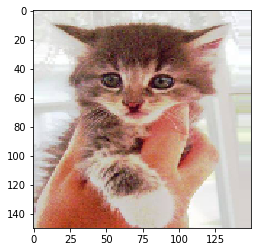

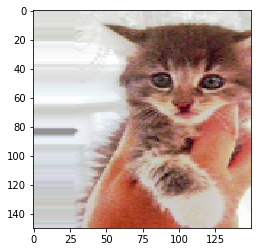

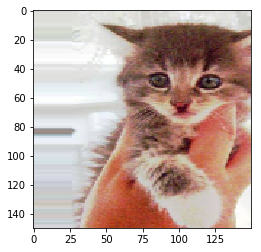

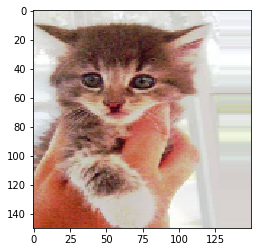

In [7]:
import matplotlib.pyplot as plt

i = 0
for batch in datagen.flow(xx, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%6 ==0:
        break
plt.show()

## 3 训练，用fit_generator训练数据

#### 设定训练迭代初始次数为30

In [54]:
history_data_arg = my_network.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 98s 985ms/step - loss: 0.6963 - acc: 0.5220 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 116s 1s/step - loss: 0.6805 - acc: 0.5500 - val_loss: 0.6630 - val_acc: 0.5670
Epoch 3/30
100/100 [==============================] - 151s 2s/step - loss: 0.6631 - acc: 0.5995 - val_loss: 0.6648 - val_acc: 0.5850
Epoch 4/30
100/100 [==============================] - 141s 1s/step - loss: 0.6467 - acc: 0.6180 - val_loss: 0.6228 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 142s 1s/step - loss: 0.6281 - acc: 0.6545 - val_loss: 0.6625 - val_acc: 0.5740
Epoch 6/30
100/100 [==============================] - 143s 1s/step - loss: 0.6173 - acc: 0.6675 - val_loss: 0.6164 - val_acc: 0.6550
Epoch 7/30
100/100 [==============================] - 142s 1s/step - loss: 0.6105 - acc: 0.6610 - val_loss: 0.5778 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 143s 1s/step 

In [ ]:
#保存模型及训练历史记录
my_network.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/cats_and_dogs_small_my_network_with_DR_without_dropout_with_30_epochs.h5')

import pickle
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_2_network_cnn_da_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(history_data_arg.history, file_pi)#将训练历史数据保存到指定文件中

#### 将训练迭代次数从30调增至100

In [12]:
history_data_arg = my_network.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

#保存模型及训练历史记录
my_network.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/cats_and_dogs_small_my_network_with_DR_without_dropout_with_100_epochs.h5')

import pickle
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_2_network_cnn_da_100_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(history_data_arg.history, file_pi)#将训练历史数据保存到指定文件中

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 130s 1s/step - loss: 0.6916 - acc: 0.5315 - val_loss: 0.6781 - val_acc: 0.5300
Epoch 2/100
100/100 [==============================] - 131s 1s/step - loss: 0.6805 - acc: 0.5530 - val_loss: 0.6666 - val_acc: 0.5830
Epoch 3/100
100/100 [==============================] - 130s 1s/step - loss: 0.6704 - acc: 0.5815 - val_loss: 0.6538 - val_acc: 0.6070
Epoch 4/100
100/100 [==============================] - 129s 1s/step - loss: 0.6592 - acc: 0.5915 - val_loss: 0.6403 - val_acc: 0.6270
Epoch 5/100
100/100 [==============================] - 129s 1s/step - loss: 0.6436 - acc: 0.6250 - val_loss: 0.6400 - val_acc: 0.6540
Epoch 6/100
100/100 [==============================] - 130s 1s/step - loss: 0.6322 - acc: 0.6465 - val_loss: 0.6412 - val_acc: 0.6080
Epoch 7/100
100/100 [==============================] - 129s 1s/step - loss: 0.6232 - acc: 0.6430 - val_loss: 0.5811 - va

Epoch 60/100
100/100 [==============================] - 157s 2s/step - loss: 0.4241 - acc: 0.8005 - val_loss: 0.4872 - val_acc: 0.7900
Epoch 61/100
100/100 [==============================] - 156s 2s/step - loss: 0.4175 - acc: 0.8075 - val_loss: 0.5364 - val_acc: 0.7550
Epoch 62/100
100/100 [==============================] - 159s 2s/step - loss: 0.4296 - acc: 0.7995 - val_loss: 0.4298 - val_acc: 0.7910
Epoch 63/100
100/100 [==============================] - 158s 2s/step - loss: 0.4321 - acc: 0.8035 - val_loss: 0.4897 - val_acc: 0.7830
Epoch 64/100
100/100 [==============================] - 152s 2s/step - loss: 0.4140 - acc: 0.8005 - val_loss: 0.4206 - val_acc: 0.8110
Epoch 65/100
100/100 [==============================] - 155s 2s/step - loss: 0.4204 - acc: 0.8050 - val_loss: 0.4703 - val_acc: 0.7840
Epoch 66/100
100/100 [==============================] - 153s 2s/step - loss: 0.4230 - acc: 0.8025 - val_loss: 0.4746 - val_acc: 0.7960
Epoch 67/100
100/100 [==============================] -

## 4 评估模型
### 4.1 参考训练数据预处理方法，定义测试集图片文件预处理函数
#### step 1:读取图像
#### step 2:将JPG文件解码为RGB像素网络
#### step 3:将像素网络转换为浮点张量
#### step 4:将[0,255]的像素值缩放到[0,1]

In [14]:
import numpy as np
def preprocess_img(img):
    x1 = image.img_to_array(img)
    x2 = x1 * 1./255
    x3 = np.expand_dims(x2, axis = 0)
    return x3

### 4.2 对测试集中的图片或自行准备的猫狗图片进行测试

#### A. 自行准备的一张测试图片

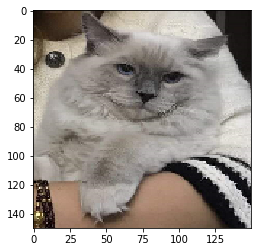

In [58]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline 

#指定非洲象图片存储路径
img_path = 'D:/2-AI读书学习笔记/99-dataset-lib/test_kangbao.jpg'
#通过target_size 指定图片加载尺寸为224 x 224，以适配VGG16模型
img = image.load_img(img_path, target_size = (150, 150))
plt.imshow(img)

In [59]:
my_network.predict(preprocess_img(img))

array([[0.34935626]], dtype=float32)

#### 模型预测分类结果为：_____________________________

#### B. 测试集图片1

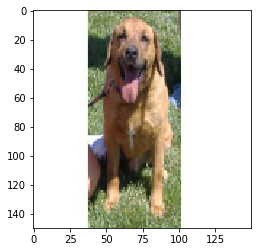

In [60]:
#指定非洲象图片存储路径
img_path2 = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/test/dogs/dog.1501.jpg'
#通过target_size 指定图片加载尺寸为224 x 224，以适配VGG16模型
img2 = image.load_img(img_path2, target_size = (150, 150))
plt.imshow(img2)

In [61]:
my_network.predict(preprocess_img(img2))

array([[0.98710454]], dtype=float32)

#### 模型预测分类结果为：_____________________________

#### C.测试集图片2

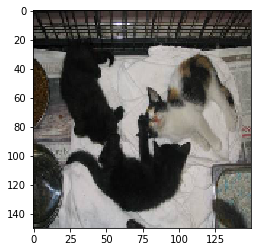

In [62]:
#指定非洲象图片存储路径
img_path3 = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/full_dataset_cat_dog/test/cats/cat.12436.jpg'
#通过target_size 指定图片加载尺寸为224 x 224，以适配VGG16模型
img3 = image.load_img(img_path3, target_size = (150, 150))
plt.imshow(img3)

In [63]:
my_network.predict(preprocess_img(img3))

array([[0.78648376]], dtype=float32)

#### 模型预测分类结果为：_____________________________

#### D.测试集图片3

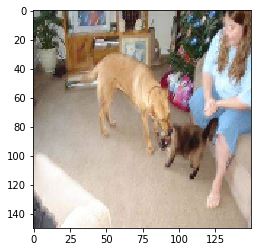

In [64]:
#指定非洲象图片存储路径
img_path4 = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/full_dataset_cat_dog/test/dogs/dog.12005.jpg'
#通过target_size 指定图片加载尺寸为224 x 224，以适配VGG16模型
img4 = image.load_img(img_path4, target_size = (150, 150))
plt.imshow(img4)

In [65]:
my_network.predict(preprocess_img(img4))

array([[0.85700566]], dtype=float32)

#### 模型预测分类结果为：_____________________________

### 4.3 评估模型在训练集/验证集损失函数变化趋势

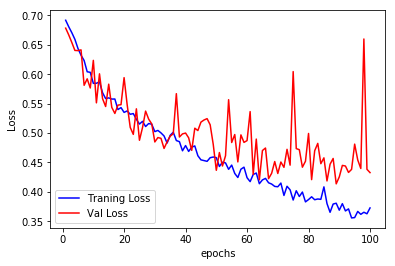

In [16]:
#import matplotlib.pyplot as plt

train_loss = history_data_arg.history['loss']
val_loss = history_data_arg.history['val_loss']

epochs = range(1, len(train_loss)+1)

plt.plot(epochs, train_loss, 'b', label = 'Traning Loss')
plt.plot(epochs, val_loss, 'r', label = 'Val Loss')

plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

#### 由上图，模型在________

### 4.4 评估模型在训练集/验证集分类准确率变化趋势

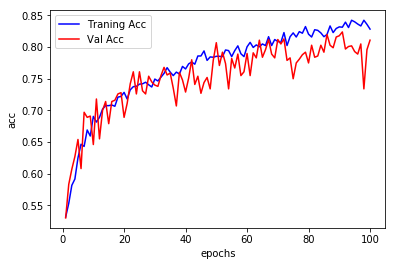

In [17]:
train_acc = history_data_arg.history['acc']
val_acc = history_data_arg.history['val_acc']

plt.plot(epochs, train_acc, 'b', label = 'Traning Acc')
plt.plot(epochs, val_acc, 'r', label = 'Val Acc')

plt.xlabel('epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

#### 由上图，模型在________

### 4.5 评估模型在测试集上的表现

In [75]:
import os
from keras.preprocessing import image

classes = ['cats','dogs']
files_name = []
test_true_labels = [] #也可以通过如下方式获取图片的标签：for data_batch, labels_batch in test_generator
test_pred_labels = []
test_pred_probs = []

for c in classes:
    test_class_dir = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/test/{}'.format(c)
    for f in os.listdir(test_class_dir):
        #读取测试图片
        files_name.append(f)
        test_true_labels.append(f[0:3])
        img_path = os.path.join(test_class_dir, f)
        img = image.load_img(img_path, target_size = (150, 150))
        
        #对测试图片进行分类预测
        pred = my_network.predict(preprocess_img(img))
        test_pred_probs.append(pred)
        
        #对分类结果进行判断
        pred_label = None
        if pred[0] > 0.5:
            pred_label = 'dog'
        else:
            pred_label = 'cat'
        test_pred_labels.append(pred_label)
        
        
import pandas as pd
df = pd.DataFrame(data={'file':files_name, 'true_label':test_true_labels,  'pred_label':test_pred_labels, 'pred_prob':test_pred_probs})


        
pred_correct_records = df[df['true_label'] == df['pred_label']].shape[0]
correct_rate = float(pred_correct_records)/float(1000)
correct_rate     

0.731

#### 模型在测试集分类准确率为_____

### 4.6 查看分类错误图片

#### 查看将“猫”误认为“狗”的部分图片

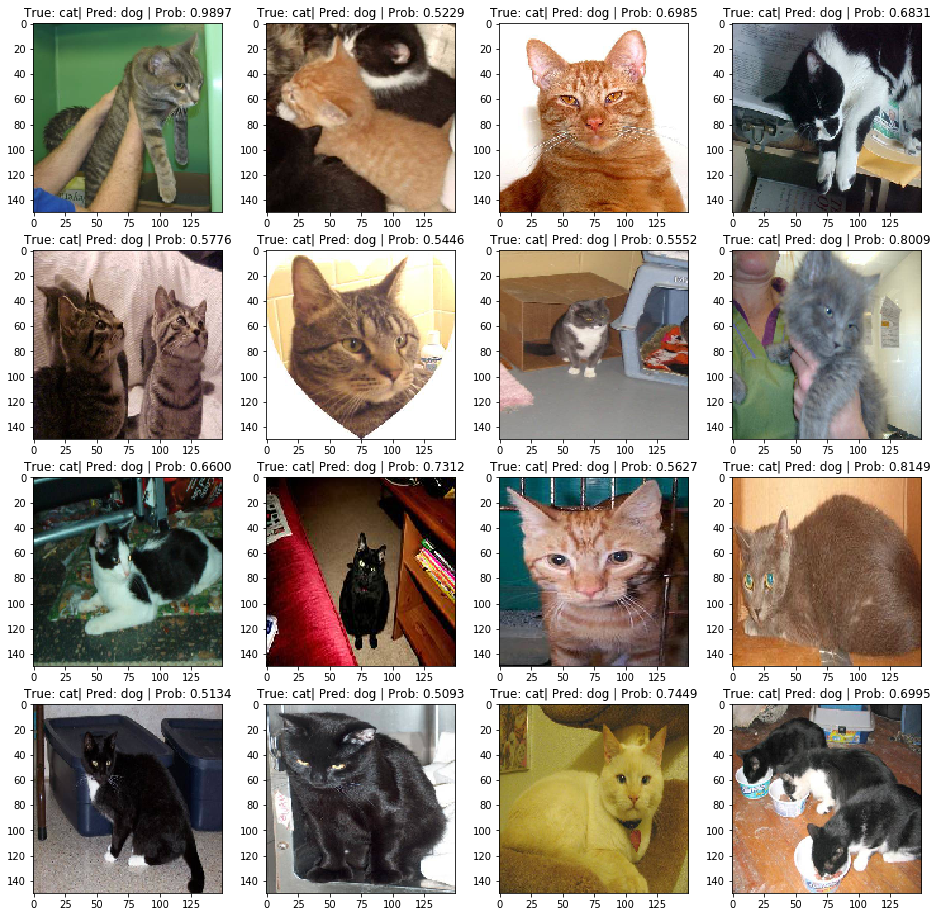

In [18]:
df_error = df[(df['true_label'] != df['pred_label']) & (df['true_label'] == 'cat')]

#对分类错误记录进行随机抽取，每次抽取16行记录，可以反复运行此段代码，随机查看分类错误图片
df_error_sample = df_error.sample(n=16, replace = False, axis = 0)
files_error = list(df_error_sample['file'])
true_labels_error =  list(df_error_sample['true_label'])
pred_labels_error =  list(df_error_sample['pred_label'])
pred_probs_error = list(df_error_sample['pred_prob'])


import matplotlib.pyplot as plt
n_rows= 4
n_cols= 4 

#16个分类错误记录用4x4图片排布展现出来
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4*n_rows))

c = 0
for i in range(n_rows):
    for j in range(n_cols):
        img_dir = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/test/cats/{}'.format(files_error[c])
        image_error = image.load_img(img_dir, target_size = (150,150))
        
        axs[i][j].imshow(image_error);
        axs[i][j].set_title('True: {}| Pred: {} | Prob: {:.4f}'.format(true_labels_error[c], pred_labels_error[c], pred_probs_error[c][0][0]));
        c+=1

#### 查看将“狗”误认为“猫”的部分图片

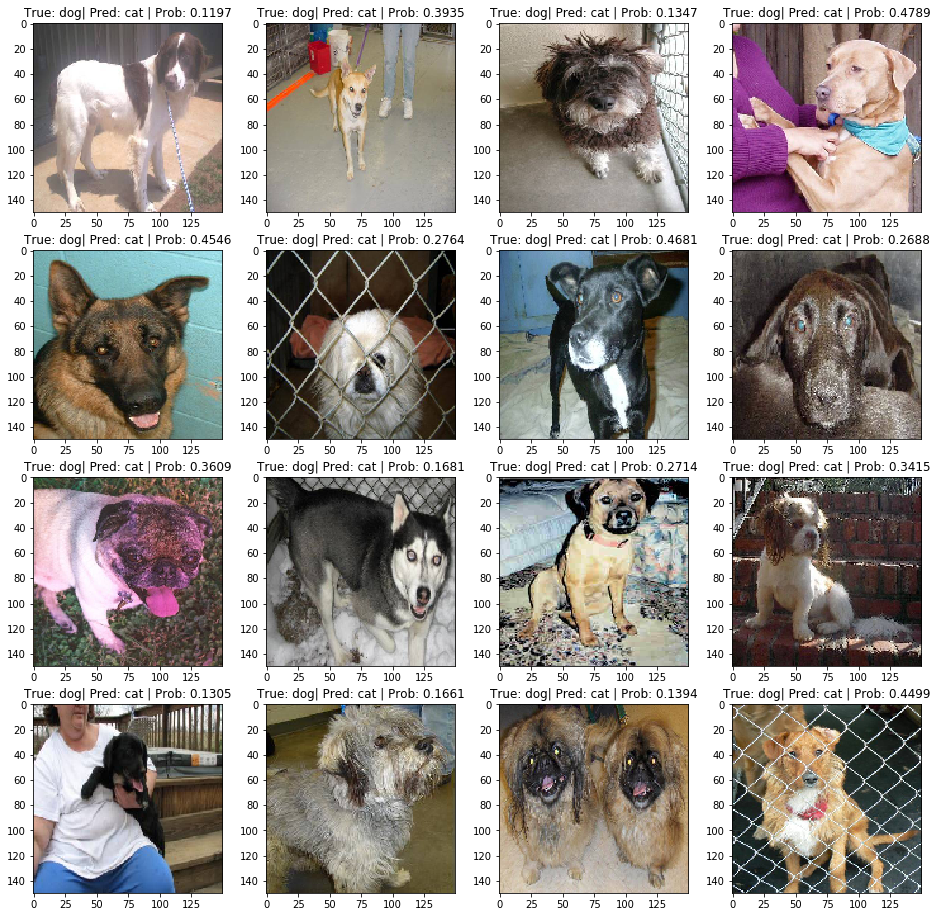

In [19]:
df_error = df[(df['true_label'] != df['pred_label']) & (df['true_label'] == 'dog')]
#对分类错误记录进行随机抽取，每次抽取16行记录，可以反复运行此段代码，随机查看分类错误图片
df_error_sample = df_error.sample(n=16, replace = False, axis = 0)
files_error = list(df_error_sample['file'])
true_labels_error =  list(df_error_sample['true_label'])
pred_labels_error =  list(df_error_sample['pred_label'])
pred_probs_error = list(df_error_sample['pred_prob'])


import matplotlib.pyplot as plt
n_rows= 4
n_cols= 4 

#16个分类错误记录用4x4图片排布展现出来
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4*n_rows))

c = 0
for i in range(n_rows):
    for j in range(n_cols):
        img_dir = 'D:/2-AI读书学习笔记/99-dataset-lib/cat_dog/small_dataset_cat_dog/test/dogs/{}'.format(files_error[c])
        image_error = image.load_img(img_dir, target_size = (150,150))
        
        axs[i][j].imshow(image_error);
        axs[i][j].set_title('True: {}| Pred: {} | Prob: {:.4f}'.format(true_labels_error[c], pred_labels_error[c], pred_probs_error[c][0][0]));
        c+=1